<a href="https://colab.research.google.com/github/rurounigit/EasyOCR/blob/master/easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

In [3]:
import json

In [4]:
import numpy as np # Import numpy

In [5]:
from PIL import Image, ImageDraw # Import Image and ImageDraw from PIL

In [6]:
image_folder = 'drive/MyDrive/easyocr'  # Replace with your folder path

In [7]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 25.3 MB/s eta 0:00:00


In [8]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [9]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image



In [10]:
# Convert NumPy int64 to native Python int before serialization
def convert_to_json_serializable(obj):
    """
    Recursively converts NumPy int64 to Python int in a nested dictionary or list.
    """
    if isinstance(obj, np.int64):
        return int(obj)  # Convert int64 to int
    elif isinstance(obj, list):
        return [convert_to_json_serializable(item) for item in obj]
    elif isinstance(obj, tuple):  # Added to handle tuples
        return tuple(convert_to_json_serializable(item) for item in obj)  # Convert tuples recursively
    elif isinstance(obj, dict):
        return {key: convert_to_json_serializable(value) for key, value in obj.items()}
    else:
        return obj

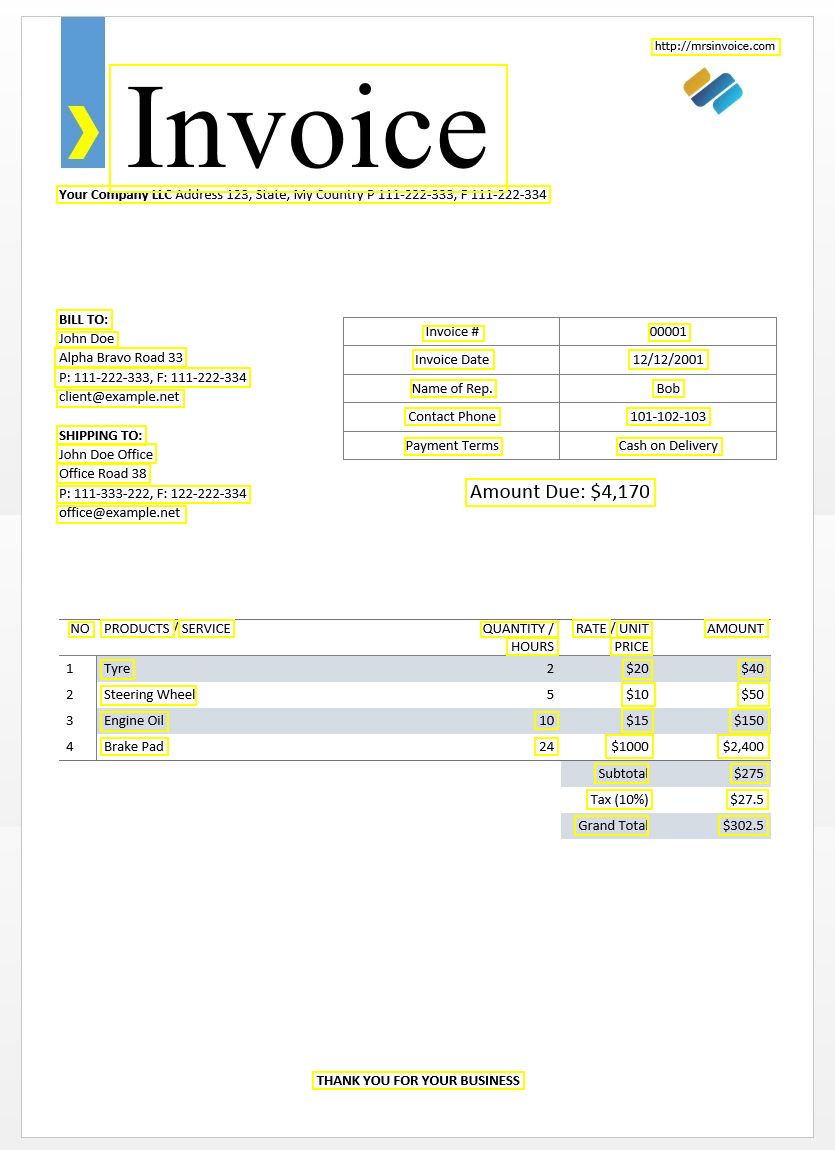

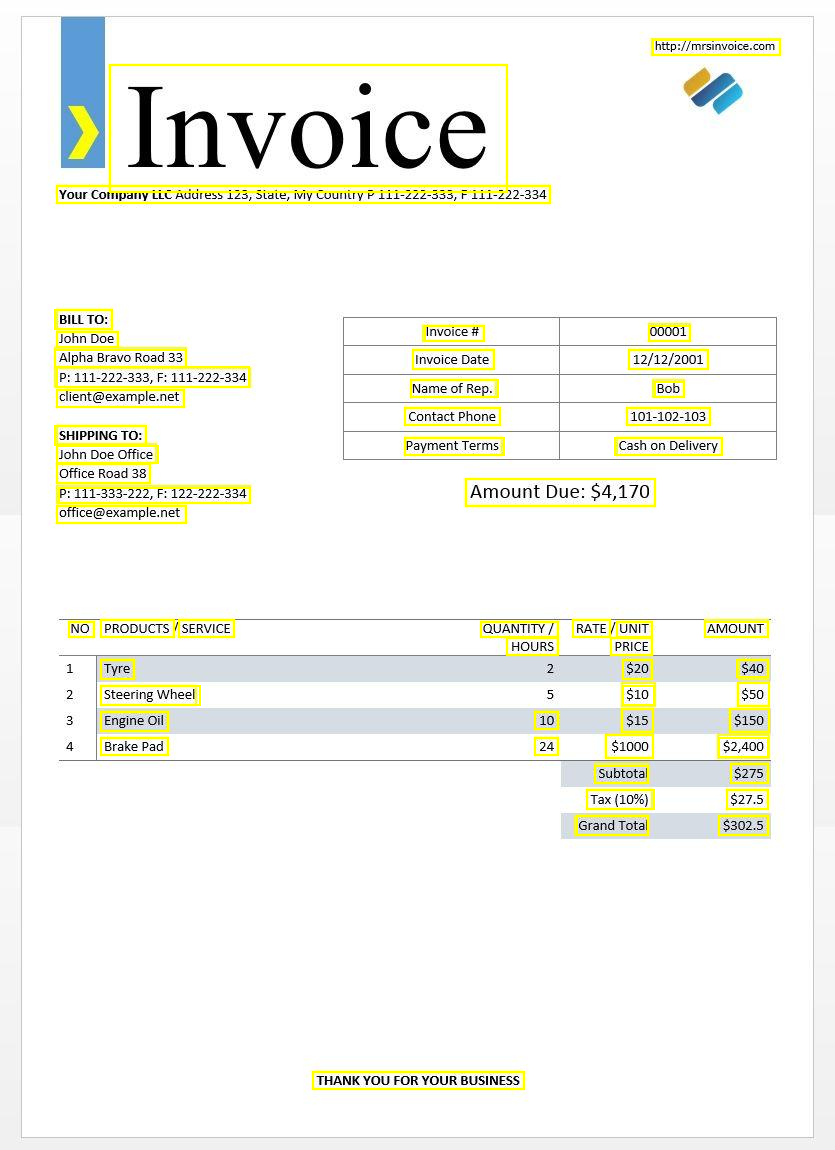

In [11]:
for filename in os.listdir(image_folder):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        image_path = os.path.join(image_folder, filename)
        im = Image.open(image_path)
        bounds = reader.readtext(image_path, paragraph=False, detail=1, text_threshold=0.7, low_text=0.3)
        draw_boxes(im, bounds).save(f"drive/MyDrive/easyocr/output/output_{filename}") # to save image
        display(im) # to show images

In [12]:
bounds

[([[653, 39], [779, 39], [779, 55], [653, 55]],
  'http:} {mrsinvoice.com',
  0.511754447783616),
 ([[110, 64], [506, 64], [506, 192], [110, 192]],
  'Invoice',
  0.999722031655585),
 ([[57, 185], [549, 185], [549, 203], [57, 203]],
  'Your COmpany iic Autress 123,Sidie, iviy Cuutiry F iii-222-353,F iii-222-334',
  0.15117752792816316),
 ([[55, 309], [111, 309], [111, 329], [55, 329]],
  'BILL TO:',
  0.9803092710694219),
 ([[57, 331], [117, 331], [117, 347], [57, 347]],
  'John Doe',
  0.8493915047003984),
 ([[425, 325], [483, 325], [483, 341], [425, 341]],
  'Invoice #',
  0.9564070314218635),
 ([[649, 325], [689, 325], [689, 341], [649, 341]],
  'OOO01',
  0.19071649148878003),
 ([[55, 349], [185, 349], [185, 367], [55, 367]],
  'Alpha Bravo Road 33',
  0.9985842947236923),
 ([[413, 349], [493, 349], [493, 369], [413, 369]],
  'Invoice Date',
  0.9522443168357329),
 ([[629, 349], [707, 349], [707, 369], [629, 369]],
  '12/12/2001',
  0.8198033527553293),
 ([[57, 366], [248, 366], [2

In [13]:
# Define the 4x4 coordinate pairs for the boxes
box01 = [(50, 300), (250, 300), (250, 420), (57, 420)]  # Example coordinates
box02 = [(50, 420), (250, 420), (250, 530), (57, 530)]
box03 = [[645, 323], [689, 323], [689, 345], [649, 345]]
box04 = [(719, 815), (767, 815), (767, 835), (719, 835)]

#[[x57, y485], [x249, y485], [x249, y503], [x57, y503]],

# Function to check if a box is inside another box
def is_inside(box, container):
    # Assuming boxes are defined by top-left and bottom-right corners
    # Adjust the logic if your boxes are defined differently
    box_x1, box_y1 = box[0][0], box[0][1]  # Top-left corner of box
    box_x2, box_y2 = box[2][0], box[2][1]  # Bottom-right corner of box
    container_x1, container_y1 = container[0][0], container[0][1]  # Top-left corner of container
    container_x2, container_y2 = container[2][0], container[2][1]  # Bottom-right corner of container

    return (
        container_x1 <= box_x1
        and container_y1 <= box_y1
        and container_x2 >= box_x2
        and container_y2 >= box_y2
    )

# Process the OCR results
filtered_results = {
    "box01": [],
    "box02": [],
    "box03": [],
    "box04": [],
}

for bound in bounds:
    box = bound[0]  # Get the coordinates of the detected box
    for box_name in filtered_results:
        if is_inside(box, globals()[box_name]):  # Access box coordinates using globals()
            filtered_results[box_name].append(bound)

# Now filtered_results is a dictionary containing the bounds for each box
filtered_results

{'box01': [([[55, 309], [111, 309], [111, 329], [55, 329]],
   'BILL TO:',
   0.9803092710694219),
  ([[57, 331], [117, 331], [117, 347], [57, 347]],
   'John Doe',
   0.8493915047003984),
  ([[55, 349], [185, 349], [185, 367], [55, 367]],
   'Alpha Bravo Road 33',
   0.9985842947236923),
  ([[57, 366], [248, 366], [248, 387], [57, 387]],
   'P: 111-222-333,F: 111-222-334',
   0.9498352607474106),
  ([[57, 389], [183, 389], [183, 407], [57, 407]],
   'client@example net',
   0.6736361412577234)],
 'box02': [([[55, 425], [145, 425], [145, 445], [55, 445]],
   'SHIPPING TO:',
   0.7855016417278436),
  ([[57, 445], [157, 445], [157, 463], [57, 463]],
   'John Doe Office',
   0.9972759157394829),
  ([[57, 463], [149, 463], [149, 483], [57, 483]],
   'Office Road 38',
   0.9995542168021494),
  ([[59, 487], [249, 487], [249, 503], [59, 503]],
   'P: 111-333-222, F: 122-222-334',
   0.6727662415143928),
  ([[57, 505], [185, 505], [185, 523], [57, 523]],
   'office@example net',
   0.779845909

In [14]:
filtered_results_serializable = convert_to_json_serializable(filtered_results)


In [15]:
# Display the dictionary in pretty JSON format
print(json.dumps(filtered_results_serializable, indent=4))

{
    "box01": [
        [
            [
                [
                    55,
                    309
                ],
                [
                    111,
                    309
                ],
                [
                    111,
                    329
                ],
                [
                    55,
                    329
                ]
            ],
            "BILL TO:",
            0.9803092710694219
        ],
        [
            [
                [
                    57,
                    331
                ],
                [
                    117,
                    331
                ],
                [
                    117,
                    347
                ],
                [
                    57,
                    347
                ]
            ],
            "John Doe",
            0.8493915047003984
        ],
        [
            [
                [
                    55,
                    349
 

In [18]:
simplified_results = {}

for box_name, bounds_list in filtered_results_serializable.items():
    simplified_results[box_name] = []  # Initialize as an empty list
    for bound in bounds_list:
        simplified_results[box_name].append(bound[1])  # Append each string value

In [19]:
# Display the dictionary in pretty JSON format
print(json.dumps(simplified_results, indent=4))

{
    "box01": [
        "BILL TO:",
        "John Doe",
        "Alpha Bravo Road 33",
        "P: 111-222-333,F: 111-222-334",
        "client@example net"
    ],
    "box02": [
        "SHIPPING TO:",
        "John Doe Office",
        "Office Road 38",
        "P: 111-333-222, F: 122-222-334",
        "office@example net"
    ],
    "box03": [
        "OOO01"
    ],
    "box04": [
        "S302.5"
    ]
}
